## Importing libraries

In [11]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

Here we will using imread from matplotlib to import the image as a matrix

## Setting image path

In [12]:
my_image = imread("Lenna.png")
print(my_image.shape)

(512, 512, 3)


## Displaying the image

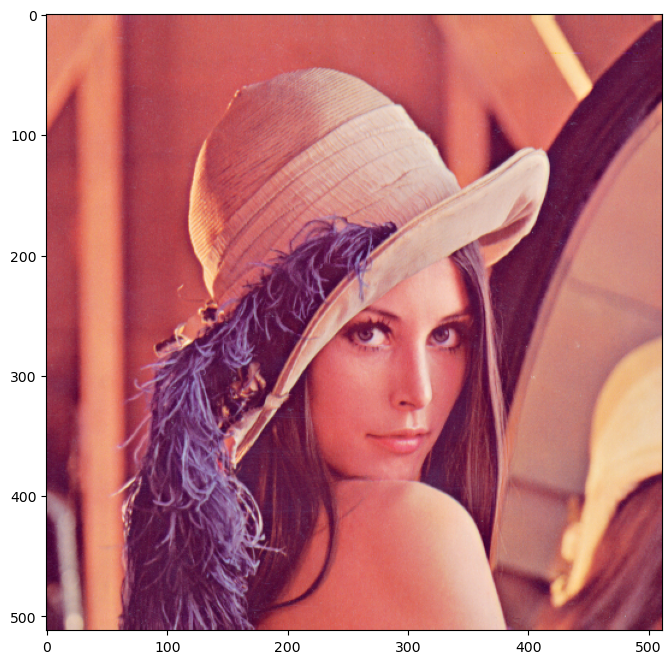

In [13]:
plt.figure(figsize=[12,8])
plt.imshow(my_image)

The image being processed is a coloured image and hance has data in 3 channels-Red, Green, Blue. Therefore the sape of the data 1200x1200x3

# Processing the image

Let us now start with our image processing. Here first, we will be grayscaling our image, and then we'll perform PCA on the matrix with all the components. We will also create and look at the scree plot to assess how many components we could retain and how much cumulative variance they capture.

## Greyscaling the image

(512, 512)
1.0


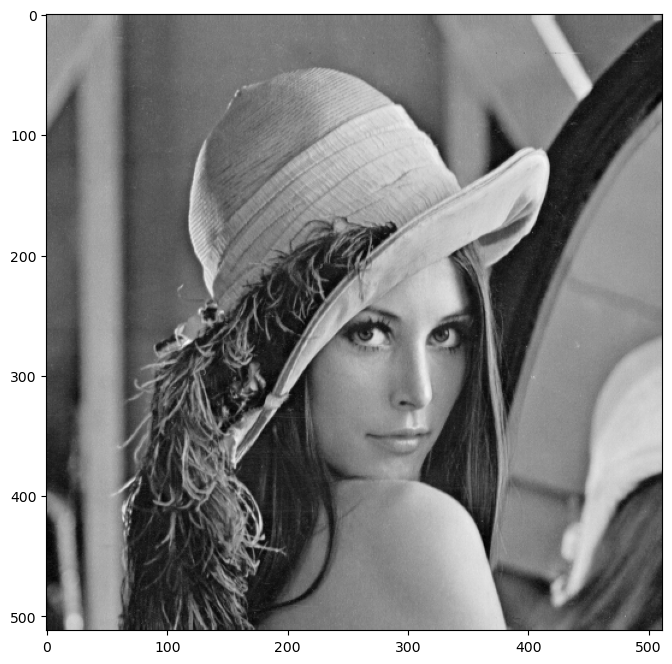

In [14]:
image_sum = my_image.sum(axis=2)
print(image_sum.shape)

new_image = image_sum/image_sum.max()
print(new_image.max())

plt.figure(figsize=[12,8])
plt.imshow(new_image, cmap=plt.cm.gray)

## Creating a scree plot

In [15]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA()
pca.fit(new_image)

PCA()

## Creating the cumulative variance

In [16]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

## How many PCs explain 95% of the variance?

Number of components explaining 95% variance: 40




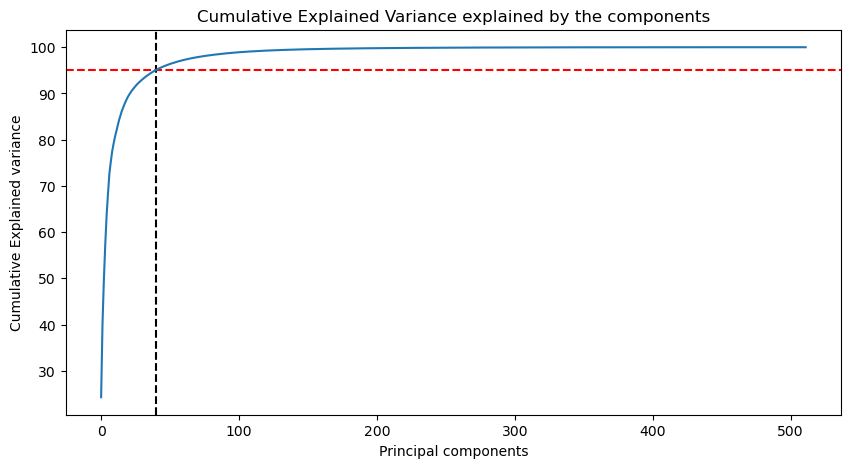

In [17]:
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+str(k))
print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.xlabel('Principal components')
plt.ylabel('Cumulative Explained variance')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

Now let's reconstruct the image using only 7 components and see if our reconstructed image comes out to be visually different from the original image

## Reconstructing using the Inverse Tranform

In [8]:
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(new_image))

## Plotting the recinstructed image

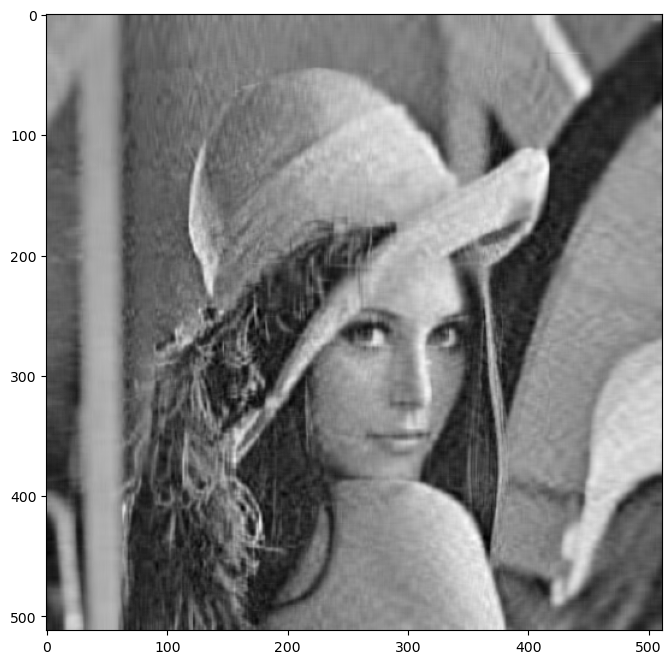

In [9]:
plt.figure(figsize=[12,8])
plt.imshow(image_recon, cmap=plt.cm.gray)

As we can observe, there is a relative difference now. We shall try with a different value of components to check if that maked a difference in the missin clariry and help capture finer details in the visuals.

## Function to reconstruct and plot image for a given number of components

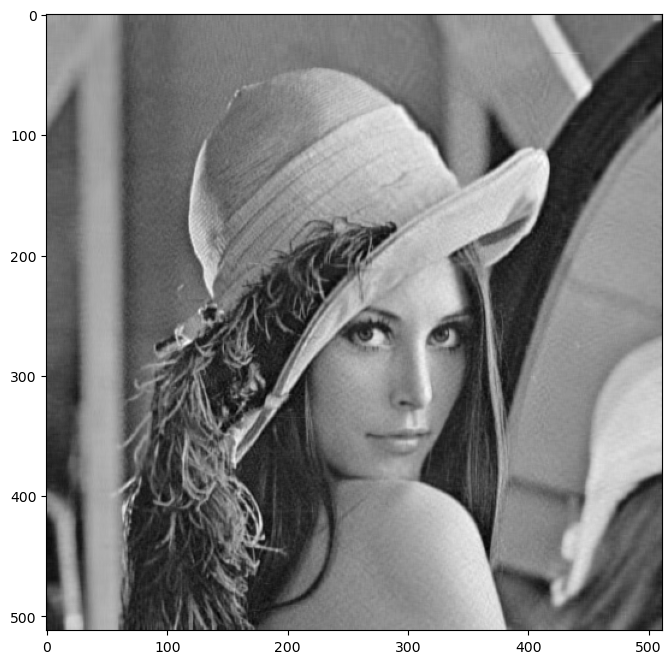

In [10]:
def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(new_image))
    plt.imshow(image_recon, cmap=plt.cm.gray)

k = 150
plt.figure(figsize=[12,8])
plot_at_k(100)

We can observe that, yes, the number of principal components do make a difference!

Plotting the same for different numbers of components to compare the exact relative difference,

## Setting different amount of K

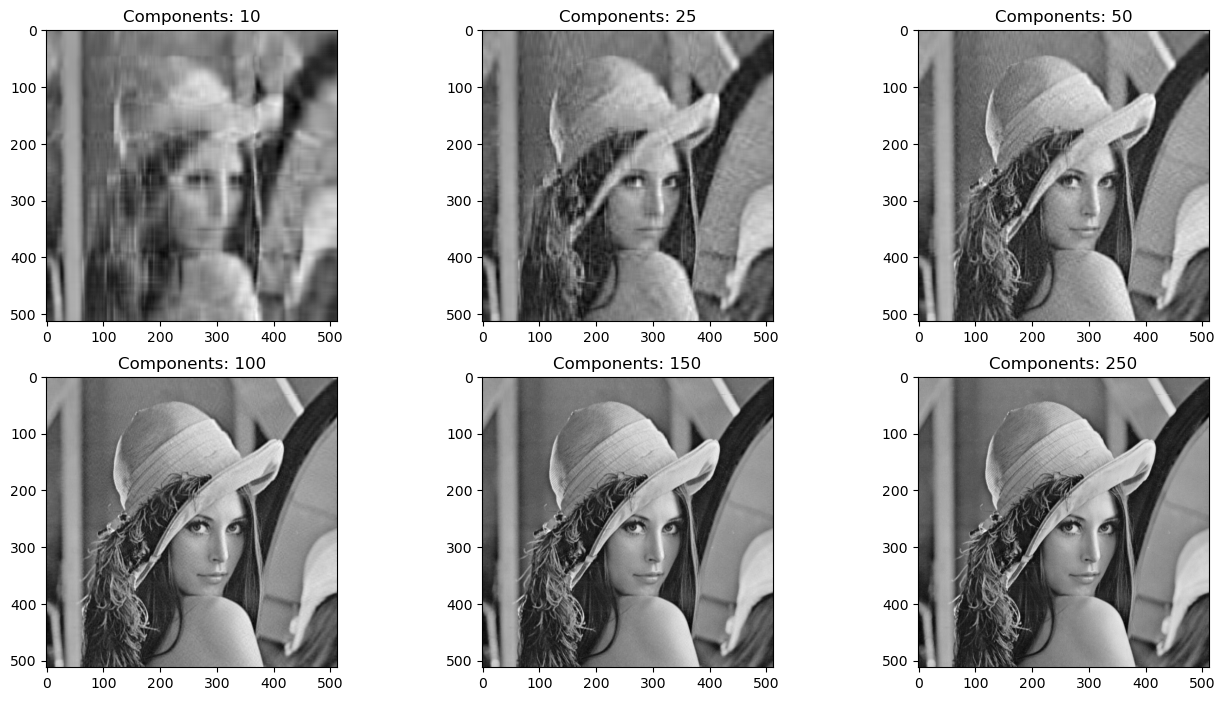

In [11]:
ks = [10, 25, 50, 100, 150, 250]

plt.figure(figsize=[15,9])

for i in range(6):
    plt.subplot(2,3,i+1)
    plot_at_k(ks[i])
    plt.title("Components: "+str(ks[i]))

plt.subplots_adjust(wspace=0.5, hspace=0.0)
plt.show()

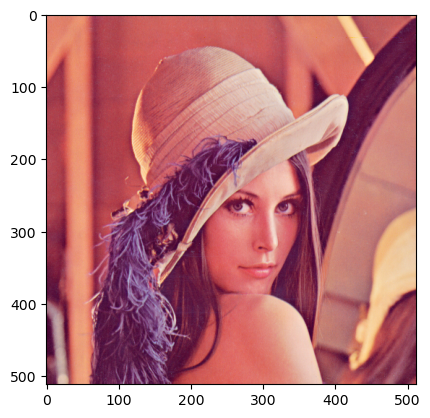

In [13]:
import cv2
img = cv2.cvtColor(cv2.imread('Lenna.png'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

## Splitting into channels

In [14]:
blue, green, red = cv2.split(img)

## Plotting the images

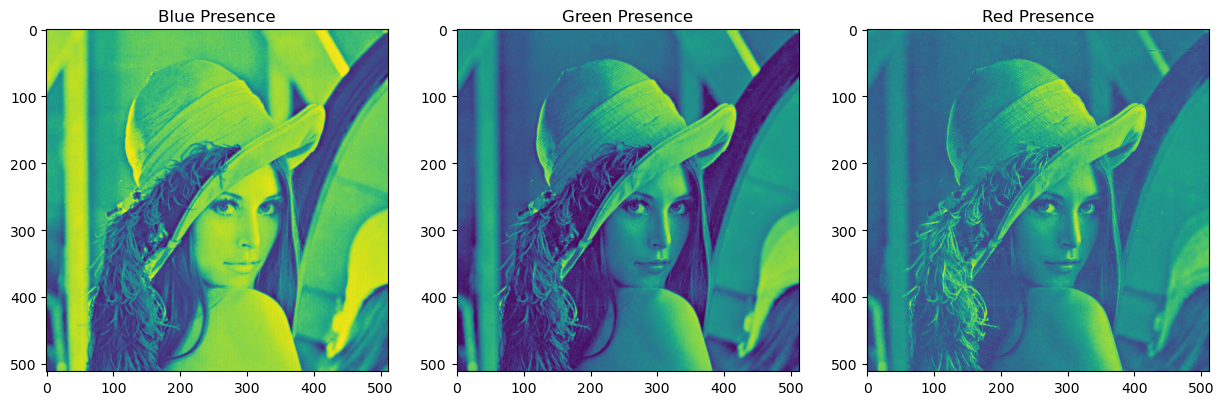

In [15]:
fig = plt.figure(figsize=(15,7.2))
fig.add_subplot(131)
plt.title("Blue Presence")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Presence")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Presence")
plt.imshow(red)
plt.show()

A particular image channel can also be converted into a data frame for further processing,

In [16]:
import numpy as np
import pandas as pd

## Creating dataframe from blue presence in image

In [17]:
blue_chnl_df = pd.DataFrame(data=blue)
blue_chnl_df

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,226,226,223,223,226,226,228,227,227,225,...,185,196,211,224,229,231,234,230,221,200
1,226,226,223,223,226,226,228,227,227,225,...,185,196,211,224,229,231,234,230,221,200
2,226,226,223,223,226,226,228,227,227,225,...,185,196,211,224,229,231,234,230,221,200
3,226,226,223,223,226,226,228,227,227,225,...,185,196,211,224,229,231,234,230,221,200
4,226,226,223,223,226,226,228,227,227,225,...,185,196,211,224,229,231,234,230,221,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,93,93,86,89,95,96,94,98,99,102,...,104,113,120,129,141,147,160,165,162,162
508,86,86,91,91,93,96,95,94,103,97,...,110,120,128,135,147,154,170,172,166,167
509,84,84,92,93,97,92,96,90,99,96,...,116,122,132,142,151,162,174,173,172,177
510,82,82,96,93,97,94,92,93,98,94,...,120,132,147,152,162,173,177,179,181,185


The data for each presence can also be fit and transformed to a particular number of cimponents for checking the variance of each color presence,

## Scaling data between 0 to 1

In [18]:
df_blue = blue/255
df_green = green/255
df_red = red/255

## Setting a reduced number of components

In [19]:
pca_b = PCA(n_components=50)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)
pca_g = PCA(n_components=50)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
pca_r = PCA(n_components=50)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

## Tranforming shape

In [20]:
print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape)

(512, 50)
(512, 50)
(512, 50)


## Checking variance after reduced components

In [21]:
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.975767786967406
Green Channel: 0.9619440797062848
Red Channel  : 0.9314352046687108


We can observe tahy by using 50 components we can keep around 99% of the variance in the data!